<h1> TUTORIAL ONE: </h1>
<h1>LOAD IN DATA AND RUN THE MOST BASIC POWER LAW FIT POSSIBLE </h1>
<h3> Author: Lindsey Gordon. Last Update: 11-17-22 </h3>

The most basic-est of basic tutorials. 

Getting etsfit installed: 
- clone repo (hopefully you already did this)
- get into terminal, cd into the outermost etsfit folder, then run **pip install .**
- double check install using **pip list** or **etsfit -v**

Example data + a TNS metafile is provided in the subfolder **tutorial_1_data**

In [7]:
#load in modules
import numpy as np
from etsfit import etsMAIN
import etsfit.utils.utilities as ut
import pandas as pd
from astropy.time import Time

The process of running a fit is essentially: 

- get your data out
- make an etsfit instance
- put your data into etsfit
- run the fit

If you want to run more complicated fits/custom fits/GP fits, try tutorial 2.

If you want to run lots of fits in a row, try tutorial 3. (This will show you where to find functions that do everything in this file, just for lots of light curves in a row)

If you want to run on data that isn't from TESS, try tutorial 4.

This tutorial uses data retrieved using **tessreduce** (Ridden-Harper 2021). 

In [35]:
#TNS info:
TNSFile = "./tutorial_1_data/2018hzh_TNS.csv"
TNSinfo = pd.read_csv(TNSFile)
#data file:
dataFile = "./tutorial_1_data/2018hzh0431-tessreduce"

#saving into our local folder
folderSave = "."

#load data:
(time, intensity, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
d = TNSinfo[TNSinfo["Name"].str.contains(targetlabel)]["Discovery Date (UT)"]
discoverytime = Time(d.iloc[0], format = 'iso', scale='utc').jd

2018hzh 04 3 1


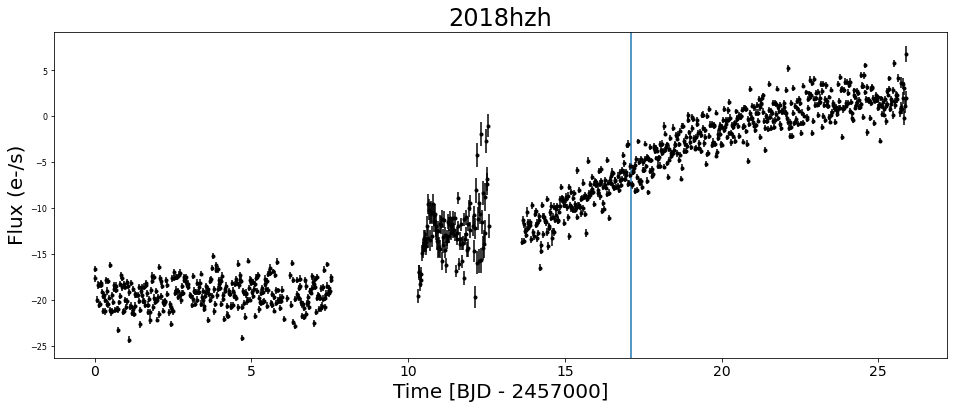

In [34]:
# NOTE if you need to re-run this cell you will also need to re-run the cell above this one
#make an etsfit instance
ets = etsMAIN(folderSave, TNSFile)
             
#load the data in                           
ets.load_single_lc(time, intensity, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
   
#(optional) run a window RMS filter over the data 
filterMade = ets.window_rms_filt(plot=False)
                
# run the cleaning function - this is where you will set things like:
    #filters (an array of 0's and 1's the same size as the input time/intensity/error arrays)
    #binning (only to 8 hours is set up at the moment)
    #or fractional fits (0-1.0, will take that percent)
# we're going to run the most basic single power law, fit type 1
                
ets.pre_run_clean(1, cutIndices=filterMade, 
                    binYesNo = False, fraction = None)

# test plot to be sure it ran
ets.test_plot()




In [32]:
# now to actually run it: 
ets.run_MCMC(n1=10000, n2=50000)
#n1 and n2 refer to the number of steps in the first and second chains
#this will save all of the output plots automatically, and will not show up in a jupyter notebook
#this is because if you run these in a regular .py file for a hundred targets you will go insane from the popups

saving into folder:  ./2020tld2921/singlepower/
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


  9%|███▍                                  | 4600/50000 [01:09<11:23, 66.39it/s]

Converged, ending chain


23700 samples post second run
$t_0$ 15.347842547676784 -0.017028351890029825 0.0169532062339961
A 3.6584410469499122 -0.04430489755427525 0.04554791957758342
$\beta$ 1.3144197068586037 -0.004698642235018369 0.004666250992528598
b 6.962663329532052 -0.014389926515526952 0.014571865021186348
log prob: [-83050.96241299]
BAYESIAN INF CRIT:  [-166069.43059464]
starting model creation time axis at:  0.0


(array([[15.34784255,  3.65844105,  1.31441971,  6.96266333]]),
 array([[0.01695321, 0.04554792, 0.00466625, 0.01457187]]),
 array([[0.01702835, 0.0443049 , 0.00469864, 0.01438993]]),
 -166069.43059463616)

To run other fit types:

- Fit type 1: single power law, flat background. See above
- Fit type 3: double power law, flat background. Run as above, swapping 1 for 3

- Fit type 2,4,5: single/double/no power law, complex quaternion/cbv background. See next cell. 

- Fit type 6: single power law, annulus background fit as part of background. If you want help with this I guess email me? 

- Fit type 0: custom inputs. See below. 

<h3>Quaternions/CBVs</h3>

Briefly - these can be downloaded from TESS. CBVs are also easily gotten from the **eleanor** (Feinstein 2019) package. 

The quaternions will, in particular, come in large horrible fits files. provide a link to a directory holding all of these to ets.use_quaternions_cbvs() to have them all converted to faster-loading text files. If the faster loading text files already exist, they'll be used without being regenerated. 

In [38]:
# running quat/CBV fitting:
#load data:
(time, intensity, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
d = TNSinfo[TNSinfo["Name"].str.contains(targetlabel)]["Discovery Date (UT)"]
discoverytime = Time(d.iloc[0], format = 'iso', scale='utc').jd

ets = etsMAIN(folderSave, TNSFile)
ets.load_single_lc(time, intensity, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filterMade = ets.window_rms_filt(plot=False)

#FIRST must set up quaternion/CBV access:
CBV_folder = "./tutorial_1_data/"
quaternion_folder_raw = "./tutorial_1_data/"
quaternion_folder_txt = quaternion_folder_raw

ets.use_quaternions_cbvs(CBV_folder, quaternion_folder_raw, 
                             quaternion_folder_txt)

ets.pre_run_clean(2, cutIndices=filterMade, 
                    binYesNo = False, fraction = None)

ets.run_MCMC(n1=10000, n2=50000)

2018hzh 04 3 1
Loading in quaternions and CBVs
Loading quaternions
quaternion load complete - loading cbvs
cbv load completed
saving into folder:  ./2018hzh0431/singlepower-CBV/
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


 38%|██████████████                       | 19000/50000 [04:15<06:57, 74.26it/s]

Converged, ending chain


26600 samples post second run
t0 10.011035346747388 -0.0506996842331624 0.04860036260417111
A 3.684097850004642 -0.052235727463330495 0.05296552089411799
beta 0.6708997207942824 -0.004835890847113888 0.004899157393109199
B -20.489953295154173 -0.042084287641376505 0.04281929270772622
cQ -1.01673676397853 -19.903247842188414 20.74433687471638
c1 -29.674786807014065 -0.24336774494685187 0.5275759513587239
c2 12.230493349800003 -5.090752445945773 5.07453874086174
c3 -28.889572149705394 -0.8302777723056209 1.745769154836296
log prob: [-10304.3734663]
BAYESIAN INF CRIT:  [-20553.27175493]
starting model creation time axis at:  0.0


(array([[ 10.01103535,   3.68409785,   0.67089972, -20.4899533 ,
          -1.01673676, -29.67478681,  12.23049335, -28.88957215]]),
 array([[4.86003626e-02, 5.29655209e-02, 4.89915739e-03, 4.28192927e-02,
         2.07443369e+01, 5.27575951e-01, 5.07453874e+00, 1.74576915e+00]]),
 array([[5.06996842e-02, 5.22357275e-02, 4.83589085e-03, 4.20842876e-02,
         1.99032478e+01, 2.43367745e-01, 5.09075245e+00, 8.30277772e-01]]),
 -20553.2717549258)

<h2> Custom Fit Parameters </h2>

You could write your own code, probably, or you can mess with as many settings in here as possible. 

I recommend looking in the etsfit.utils.mcmc.py module for how to write a custom log probability function compatible with emcee. 

In [45]:
#code for a custom fit
# =============================================================================

#the same stuff from before: 
(time, intensity, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
d = TNSinfo[TNSinfo["Name"].str.contains(targetlabel)]["Discovery Date (UT)"]
discoverytime = Time(d.iloc[0], format = 'iso', scale='utc').jd
ets = etsMAIN(folderSave, TNSFile)
ets.load_single_lc(time, intensity, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filterMade = ets.window_rms_filt(plot=False)
ets.pre_run_clean(0, cutIndices=filterMade, 
                    binYesNo = False, fraction = None)

# CUSTOMIZED THINGS:
    #please note these are just made up numbers for the example and the output might not look great
priors = [0, 20, 0.5, 1, 0.0, 5.0, -5, 5] #t0, A, beta, B
args = (ets.time, ets.intensity, ets.error, ets.disctime, priors)
import etsfit.utils.MCMC as mc
logProbFunc = mc.log_probability_singlepower_noCBV #or you could write your own -> this is the same fit 1
filesavetag = "-singlepower-custom-arg-test"
labels = ["t0", "A", "beta",  "b"]
start_t = min(ets.disctime-3, ets.time[-1]-2)
init_values = np.array((ets.disctime-3, 0.8, 1.8, 1))


ets.run_MCMC(n1=10000, n2=25000, args=args, logProbFunc=logProbFunc, plotFit=1,
             filesavetag=filesavetag, labels=labels, init_values=init_values)
    
 
# =============================================================================


2018hzh 04 3 1
saving into folder:  ./2018hzh0431/singlepower-custom-arg-test/
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


100%|████████████████████████████████████| 25000/25000 [03:52<00:00, 107.74it/s]


125000 samples post second run
t0 17.490192824499406 -0.02141024930230273 0.02811663748020976
A 0.999262997989856 -0.0016171640613509286 0.00857599573845702
beta 0.9238368672360437 -0.0031287954849380517 0.005804414098540822
b -4.999982613700666 -1.3375499192669338e-05 0.0019151438858102665
log prob: [-369514.51545975]
BAYESIAN INF CRIT:  [-739001.29333065]
starting model creation time axis at:  0.0


(array([[17.49019282,  0.999263  ,  0.92383687, -4.99998261]]),
 array([[0.02811664, 0.008576  , 0.00580441, 0.00191514]]),
 array([[2.14102493e-02, 1.61716406e-03, 3.12879548e-03, 1.33754992e-05]]),
 -739001.2933306533)